# 1.StarCraft 2 AI  웹 크롤링 

In [5]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup
import time

In [8]:
browser = wd.Chrome(executable_path='chromedriver.exe')
url = 'https://www.youtube.com/watch?v=h7Q_57U4oj4'
browser.get(url)

last_page_height = browser.execute_script('return document.documentElement.scrollHeight')
while True:
    browser.execute_script('window.scrollTo(0,document.documentElement.scrollHeight)')
    time.sleep(3.0)
    new_page_height = browser.execute_script('return document.documentElement.scrollHeight')
    
    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height

In [10]:
html_source = browser.page_source

In [11]:
soup = BeautifulSoup(html_source, 'html.parser')

In [12]:
youtube_likes = soup.select('span#vote-count-middle')
youtube_comments = soup.select('yt-formatted-string#content-text')

In [13]:
str_youtube_likes = []
str_youtube_comments =[]

for i in range(len(youtube_likes)):
    str_tmp = str(youtube_likes[i].text)
    str_tmp = str_tmp.replace('\n', '')
    str_tmp = str_tmp.replace('\t', '')
    str_tmp = str_tmp.replace('                ','')
    str_youtube_likes.append(str_tmp)
    
    str_tmp = str(youtube_comments[i].text)
    str_tmp = str_tmp.replace('\n','')
    str_tmp = str_tmp.replace('\t','')
    str_tmp = str_tmp.replace('                ','')
    str_tmp = str_tmp.lower()
    str_youtube_comments.append(str_tmp)
    
for i in range(len(str_youtube_likes)):
    print(str_youtube_likes[i], str_youtube_comments[i])

        693       this is my first ever video to reach 1 million views. thank you so much for watching. <3
        1.4천       i could see auto-casting nukes as a recipe for hilarious disaster.random ghost in base: "zergling in my base? i think not! calling in a nuke!"
        52       nukes are real scalelaunches nukeentire battlefield wiped out
        217       the armored transport can use the units inside it to attack. it can be as powerful as a deathball full of infantry in a smaller size.
        166       for april fool's, blizzard should make all the multiplayer matches with this mod, for april 1st.
        1.2천       full auto...nukes...who decided those things should ever be combined?
        412       don't battlecruisers drop command centres in the actual lore? it should be like a little city in the sky. way bigger than that at least. also, the nuke should cover the entire map.
        393       you should play another round as zerg and use the overlord strat where you spaw

In [14]:
import pandas as pd
data = pd.DataFrame({'likes' : str_youtube_likes, 'reviews' : str_youtube_comments})
data

,likes,reviews
0,693,this is my first ever video to reach 1 million...
1,1.4천,i could see auto-casting nukes as a recipe for...
2,52,nukes are real scalelaunches nukeentire battle...
3,217,the armored transport can use the units inside...
4,166,"for april fool's, blizzard should make all the..."
...,...,...
95,0,"hah! love where your face is in the video, goo..."
96,0,even the smallest nuke we have in real life to...
97,0,i love watching your channel! great job! :)
98,0,please tvz in real scale <3 hahahaha


In [17]:
data['likes']=data['likes'].str.replace('천', 'e3').astype('float32')
data

,likes,reviews
0,693.0,this is my first ever video to reach 1 million...
1,1400.0,i could see auto-casting nukes as a recipe for...
2,52.0,nukes are real scalelaunches nukeentire battle...
3,217.0,the armored transport can use the units inside...
4,166.0,"for april fool's, blizzard should make all the..."
...,...,...
95,0.0,"hah! love where your face is in the video, goo..."
96,0.0,even the smallest nuke we have in real life to...
97,0.0,i love watching your channel! great job! :)
98,0.0,please tvz in real scale <3 hahahaha


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [20]:
tdm = cv.fit_transform(data['reviews'])

In [21]:
tdm.shape

(100, 563)

In [22]:
word_count = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat
})

In [23]:
word_count.head()

,단어,빈도
0,00,2
1,06,1
2,10,3
3,1000,1
4,100ish,1


In [24]:
from wordcloud import WordCloud

In [25]:
wc = WordCloud(background_color='white', max_words=5000, width=400, height=300)

In [26]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [27]:
cloud = wc.fit_words(count_dic)

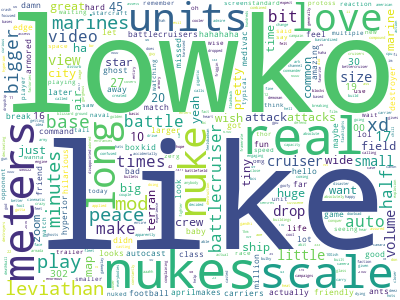

In [28]:
cloud.to_image()